In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


# Assignment 8

1. Take the data we had for the tea cooling, and fit a linear regression model to it.  Use the `cooling1(t)` function to expand the data set to include the value for `t=6`.  Make a linear regression model for this new data set.  By adding a single data point, by how much did the slope of the regression model increase or decrease (as a percentage of the original slope)?
2. Using the marketing data `MLR.csv` from the multiple linear regression section, create individual single linear regression models for budget vs sales, and visits vs sales.  By what percentage were each of these models off from the value we got for `marketing_model(1.6,2.1)`?
3. Consider the data set from the overfitting section: <br>
`x1 = np.array([0.1,2.1,2.5,3.3,6.1,7.2,8.3,8.7,9.0])
y1 = np.array([3.1,1.5,3.5,2.0,6.0,8.5,7.1,9.5,6.7])`<br>
 Create a cubic (degree 3 polynomial) regression model for it.  Suppose that it turned out there was an 11th data point we
 didn't know about before: `(x,y)=(10,8.9)`.  Which of the models (linear, cubic, and degree 5 polynomial) most accurately predicted this data point? (i.e.: for which model was the distance minimized between the model's prediction for `x=10` and the actual data point?)
4. Use the `customer_info.csv` for these questions.  Instead of using sklearn's multiple linear regression, instead use statsmodel's OLS regression from `statsmodels.formula.api`.  Documentation can be found here:<br>
http://www.statsmodels.org/dev/example_formulas.html<br>

  1.  The big Telecom that you work for is interested in the relationship between the number of employees who work at a company, and how much they spend on different products. Perform two linear regressions, each with EMP as the independent variable, but with MOBILITY as the dependent variable in one and INTERNET as the dependent variable in the other. Describe in words the relationship between each of these revenue categories and the number of employees at a company. Do these results make sense to you? Why or why not?
  2.   We are now interested in how the relationship between Mobility revenue and employees changes across different industries. Pick two industries to investigate, and create two data frames, each with data on one of your chosen industries. Run a regression on each data frame to see how the relationship between the number of employees changes between industries. Describe your findings in words. (Note: it would be good if we could organize ourselves so that at least one person is doing each possible pair of industries.)
  3. Repeat the same exercise with Internet revenue instead of Mobility.
  4. (Optional) To see how effects differ across categorical variables using a regression, it is useful to use an interaction term. Use an interaction term to investigate the effect of employees on mobility across all industries.
  5.  Use your findings to make a recommendation to the marketing team about how they could use information about how many employees work at companies to create campaigns with the highest return.

5. (Bonus) Using the cooling model we made for the cup of tea, find the precise time (minutes, to within 2 decimal places) that the tea reaches room temperature. 

# 1.

In [3]:
from scipy import stats

t1 = pd.DataFrame({'Temp':[85.0, 80.3, 75.4, 68.0, 64.6, 56.1, 55.6, 51.0]}, index=[0,0.5,1,2,2.5,3.75,4,5])
t1

,Temp
0.00,85.0
0.50,80.3
1.00,75.4
2.00,68.0
2.50,64.6
3.75,56.1
4.00,55.6
5.00,51.0


In [4]:
def cooling1(t):
    return 18+67*((50/67)**(t/2))

t2 = pd.DataFrame({'Temp':[85.0, 80.3, 75.4, 68.0, 64.6, 56.1, 55.6, 51.0, cooling1(6)]}, index=[0,0.5,1,2,2.5,3.75,4,5,6])

In [5]:
t2

,Temp
0.00,85.000000
0.50,80.300000
1.00,75.400000
2.00,68.000000
2.50,64.600000
3.75,56.100000
4.00,55.600000
5.00,51.000000
6.00,45.845845


In [6]:
original_slope, intercept, r_value, p_value, slope_std_error = stats.linregress(t1.index, t1['Temp'])

original_slope

-6.871986183074267

In [7]:
new_slope, intercept, r_value, p_value, slope_std_error = stats.linregress(t2.index, t2['Temp'])

new_slope

-6.4978551434908525

In [8]:
((new_slope - original_slope)/original_slope)*100

-5.444292663231782

So there was an $\sim 5.4$ percent shift with the added data point.

# 2.

In [9]:
mlr = pd.read_csv('MLR.csv')
mlr.head(10)

FileNotFoundError: File b'MLR.csv' does not exist

In [0]:
# budgets vs sales
bslope, bintercept, r_value, p_value, slope_std_error = stats.linregress(mlr['Marketing Budget'], mlr['Number of Sales'])
# visits vs sales
vslope, vintercept, r_value, p_value, slope_std_error = stats.linregress(mlr['Website Visits'], mlr['Number of Sales'])

In [0]:
def budget_line(x):
    return bslope*x + bintercept
def visit_line(x):
    return vslope*x + vintercept

In [0]:
# The original model had a value of 20.0 for (budget,visits) = (1.6,2.1)
budget_line(1.6)

27.143710136417219

In [0]:
visit_line(2.1)

18.386730952370556

In [0]:
b = (20.0-budget_line(1.6))/20.0*100
v = (20.0-visit_line(2.1))/20.0*100
print('The budget line was off by %s percent' % b)
print('The visit line was off by %s percent' % v)

The budget line was off by -35.7185506821 percent
The visit line was off by 8.06634523815 percent


# 3.

In [0]:
x1 = np.array([0.1,2.1,2.5,3.3,6.1,7.2,8.3,8.7,9.0])
y1 = np.array([3.1,1.5,3.5,2.0,6.0,8.5,7.1,9.5,6.7])

In [0]:
b0, b1, b2, b3 = np.polynomial.polynomial.polyfit(x1, y1, 3)
d0, d1, d2, d3, d4, d5 = np.polynomial.polynomial.polyfit(x1, y1, 5)
intc,slp = np.polynomial.polynomial.polyfit(x1, y1, 1)

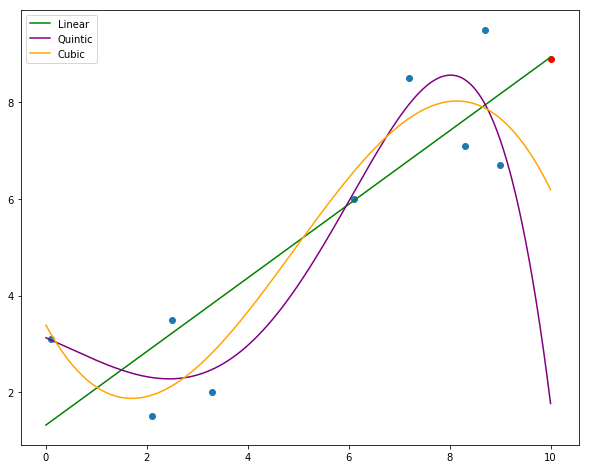

In [0]:
x2 = np.arange(0,10+0.01,0.01)
scatter(x1,y1);
scatter(10,8.9, color='red');
plt.plot(x2, slp*x2 + intc, color='green',label='Linear');
plt.plot(x2,d0 + d1*x2 + d2*(x2**2)+ d3*(x2**3)+ d4*(x2**4)+ d5*(x2**5), color='purple',label='Quintic');
plt.plot(x2,b0 + b1*x2 + b2*(x2**2)+ b3*(x2**3), color='orange',label='Cubic');
plt.legend()
plt.show();

In [0]:
print('The absolute error for the linear model was %s' % abs(8.9 - (slp*10 + intc)))
print('The absolute error for the cubic model was %s' % abs(8.9 - (b0 + b1*10 + b2*(10**2)+ b3*(10**3))))
print('The absolute error for the quintic model was %s' % abs(8.9 - (d0 + d1*10 + d2*(10**2)+ d3*(10**3)
                                                                     + d4*(10**4)+ d5*(10**5))))

The absolute error for the linear model was 0.0372720123792
The absolute error for the cubic model was 2.70622092133
The absolute error for the quintic model was 7.13587497185


So the linear model was by far the closest.

# 4.A.

In [11]:
from statsmodels.formula.api import ols

df = pd.read_csv("customer_info.csv")
r1 = ols("MOBILITY ~ EMP", data = df).fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MOBILITY   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     3946.
Date:                Sun, 19 Aug 2018   Prob (F-statistic):               0.00
Time:                        11:23:49   Log-Likelihood:                -87406.
No. Observations:                8757   AIC:                         1.748e+05
Df Residuals:                    8755   BIC:                         1.748e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3183.7924     63.814     49.892      0.000    3058.701    3308.883
EMP           23.2909      0.371     62.818      0.000      22.564      24.018
==============================================================================
Omnibus:                     6104.538   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           226322.330
Skew:                           2.876   Prob(JB):                         0.00
Kurtosis:                      27.232   Cond. No.                         196.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
df.head()

,CUSTOMER_ID,INDUSTRY,EMP,ANNUAL_SALES,PROVINCE,MOBILITY,INTERNET
0,129078,Finance and Insurance,36.0,NaN,AB,10192.825459,699.539869
1,128424,Construction,261.0,10675108.0,BC,17367.492873,1907.819410
2,125960,Finance and Insurance,10.0,756786.0,AB,6162.609229,1789.017919
3,120981,Construction,31.0,1223808.0,BC,19176.373541,2123.016418
4,129251,Education,NaN,1148650.0,AB,1538.194116,1620.096543


In [0]:
r2 = ols("INTERNET ~ EMP", data = df).fit()
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               INTERNET   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     211.6
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           2.14e-47
Time:                        16:28:58   Log-Likelihood:                -83031.
No. Observations:                8757   AIC:                         1.661e+05
Df Residuals:                    8755   BIC:                         1.661e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3230.7174     38.724     83.430      0.000    3154.810    3306.625
EMP            3.2731      0.225     14.548      0.000       2.832       3.714
==============================================================================
Omnibus:                     1913.515   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3490.841
Skew:                           1.396   Prob(JB):                         0.00
Kurtosis:                       4.331   Cond. No.                         196.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results show that on average, Mobility revenue increases by about \$23 per additional employee, and Internet revenue increases by about \$3 per additional employee. This seems to make sense since Mobility revenue is intuitively more of a variable cost, especially for companies that purchase phones for their employees.

# B.

For construction & finance:

In [0]:
fin = df[df.INDUSTRY == "Finance and Insurance"]
con = df[df.INDUSTRY == "Construction"]

In [0]:
fin_regression = ols("MOBILITY ~ EMP", data = fin).fit()
fin_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MOBILITY   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05819
Date:                Tue, 31 Oct 2017   Prob (F-statistic):              0.809
Time:                        16:29:56   Log-Likelihood:                -14238.
No. Observations:                1457   AIC:                         2.848e+04
Df Residuals:                    1455   BIC:                         2.849e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4131.4405    146.237     28.252      0.000    3844.584    4418.297
EMP           -0.5573      2.310     -0.241      0.809      -5.089       3.975
==============================================================================
Omnibus:                     1639.560   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274899.645
Skew:                           5.328   Prob(JB):                         0.00
Kurtosis:                      69.443   Cond. No.                         83.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
con_regression = ols("MOBILITY ~ EMP", data = con).fit()
con_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MOBILITY   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     1207.
Date:                Tue, 31 Oct 2017   Prob (F-statistic):          1.14e-203
Time:                        16:30:18   Log-Likelihood:                -18887.
No. Observations:                1835   AIC:                         3.778e+04
Df Residuals:                    1833   BIC:                         3.779e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6723.7707    200.454     33.543      0.000    6330.629    7116.913
EMP           22.2663      0.641     34.747      0.000      21.009      23.523
==============================================================================
Omnibus:                      849.926   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12751.398
Skew:                           1.779   Prob(JB):                         0.00
Kurtosis:                      15.414   Cond. No.                         376.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

These results show that in the finance industry, there is not really any correlation (if anything, it is negative) between the number of employees and mobility revenue. On the other hand, in construction each additional employee leads to \$22 in mobility revenue. Maybe this suggests that in the finance industry it is rare for many employees to get phones, but it is relatively common in construction.

# C.

In [0]:
fin_regression = ols("INTERNET ~ EMP", data = fin).fit()
fin_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               INTERNET   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     88.56
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           1.86e-20
Time:                        16:31:02   Log-Likelihood:                -13693.
No. Observations:                1457   AIC:                         2.739e+04
Df Residuals:                    1455   BIC:                         2.740e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2710.2125    100.569     26.949      0.000    2512.937    2907.488
EMP           14.9522      1.589      9.411      0.000      11.835      18.069
==============================================================================
Omnibus:                      320.608   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              574.530
Skew:                           1.379   Prob(JB):                    1.75e-125
Kurtosis:                       4.365   Cond. No.                         83.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
con_regression = ols("INTERNET ~ EMP", data = con).fit()
con_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               INTERNET   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     20.42
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           6.61e-06
Time:                        16:31:10   Log-Likelihood:                -17681.
No. Observations:                1835   AIC:                         3.537e+04
Df Residuals:                    1833   BIC:                         3.538e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3970.4152    103.873     38.224      0.000    3766.693    4174.137
EMP            1.5006      0.332      4.519      0.000       0.849       2.152
==============================================================================
Omnibus:                      233.018   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              331.307
Skew:                           1.041   Prob(JB):                     1.14e-72
Kurtosis:                       3.019   Cond. No.                         376.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This shows that in finance, companies spend \$14 for every additional employee, whereas in construction they spend on \$1.50 more on each additional employee. Note that the $R^2$ measures here are much smaller than for mobility, but the corefficients are still significant.


# D.

In [0]:
int_regression1 = ols("MOBILITY ~ INDUSTRY * EMP", data = df).fit()
int_regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MOBILITY   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     672.6
Date:                Tue, 31 Oct 2017   Prob (F-statistic):               0.00
Time:                        16:31:56   Log-Likelihood:                -85415.
No. Observations:                8662   AIC:                         1.709e+05
Df Residuals:                    8650   BIC:                         1.709e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              2420.7467    238.066     10.168      0.000    1954.080    2887.414
INDUSTRY[T.Construction]               4303.0240    271.335     15.859      0.000    3771.142    4834.906
INDUSTRY[T.Education]                  1375.3871    310.540      4.429      0.000     766.655    1984.119
INDUSTRY[T.Finance and Insurance]      1710.6938    286.702      5.967      0.000    1148.689    2272.699
INDUSTRY[T.Food Services]              -939.4231    266.201     -3.529      0.000   -1461.241    -417.606
INDUSTRY[T.Healthcare]                 3545.3044    290.608     12.200      0.000    2975.643    4114.965
EMP                                       2.5249      1.633      1.547      0.122      -0.675       5.725
INDUSTRY[T.Construction]:EMP             19.7414      1.685     11.718      0.000      16.439      23.044
INDUSTRY[T.Education]:EMP                 1.8932      2.978      0.636      0.525      -3.944       7.730
INDUSTRY[T.Finance and Insurance]:EMP    -3.0822      3.006     -1.025      0.305      -8.975       2.810
INDUSTRY[T.Food Services]:EMP             5.9179      2.842      2.082      0.037       0.346      11.490
INDUSTRY[T.Healthcare]:EMP                6.2771      1.856      3.382      0.001       2.639       9.915
==============================================================================
Omnibus:                     6695.858   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388059.735
Skew:                           3.211   Prob(JB):                         0.00
Kurtosis:                      35.155   Cond. No.                     2.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
int_regression2 = ols("INTERNET ~ INDUSTRY * EMP", data = df).fit()
int_regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               INTERNET   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     42.29
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           2.73e-90
Time:                        16:32:08   Log-Likelihood:                -82001.
No. Observations:                8662   AIC:                         1.640e+05
Df Residuals:                    8650   BIC:                         1.641e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              3477.0351    160.534     21.659      0.000    3162.350    3791.721
INDUSTRY[T.Construction]                493.3802    182.968      2.697      0.007     134.719     852.042
INDUSTRY[T.Education]                  -712.6793    209.405     -3.403      0.001   -1123.163    -302.196
INDUSTRY[T.Finance and Insurance]      -766.8226    193.331     -3.966      0.000   -1145.797    -387.848
INDUSTRY[T.Food Services]              -977.4749    179.506     -5.445      0.000   -1329.350    -625.600
INDUSTRY[T.Healthcare]                  194.3645    195.964      0.992      0.321    -189.772     578.501
EMP                                       1.4031      1.101      1.275      0.202      -0.755       3.561
INDUSTRY[T.Construction]:EMP              0.0975      1.136      0.086      0.932      -2.129       2.324
INDUSTRY[T.Education]:EMP                11.2051      2.008      5.581      0.000       7.269      15.141
INDUSTRY[T.Finance and Insurance]:EMP    13.5491      2.027      6.684      0.000       9.576      17.523
INDUSTRY[T.Food Services]:EMP            10.0017      1.917      5.218      0.000       6.245      13.759
INDUSTRY[T.Healthcare]:EMP                0.7609      1.252      0.608      0.543      -1.693       3.214
==============================================================================
Omnibus:                     1721.934   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2969.929
Skew:                           1.315   Prob(JB):                         0.00
Kurtosis:                       4.146   Cond. No.                     2.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

These results show that the industry where the relationship between mobility revenue and employees is the strongest is Construction, and there is also a strong relationship in Food Services and Healthcare. The relationship is small or non-existent in Education and Finance.

On the other hand, the relationship between number of employees and Internet revenue is strongest in Finance and Insurance, followed by Education and then Food Services. This relationship is small or nonexistent in Construction and Healthcare.


# E.

The most lucrative segment for mobility is probably construction companies with a lot of employees, followed by Healthcare with a lot of employees. The number of employees doesn't really matter for Education or Finance (at least for mobility). On the other hand, Internet revenues will be highest at financial companies with many employees. Food services companies have a strong relationship in both Internet and Mobility, so food service companies with many employees will be more lucrative for package deals